<a href="https://colab.research.google.com/github/krag-harsh/k_means_clustering/blob/master/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Implimenting k-mean clustering on my own<H1/>

In [64]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [65]:
from google.colab import files
uploaded=files.upload()

Saving durudataset.txt to durudataset (2).txt
Saving flame.txt to flame (2).txt


In [66]:
data1=np.loadtxt("durudataset.txt")
data2=np.loadtxt("flame.txt")

In [67]:
np.mean(data1,axis=0,keepdims=True)

array([[0.90194657, 0.92928929]])

In [68]:
print(data1)
#print((0.1967**2 - 0.4132**2)+(0.26617**2 - 0.35582**2))

[[0.19670575 0.26617497]
 [0.41328699 0.35582835]
 [0.33843555 0.43573826]
 [0.10380152 0.16434481]
 [0.15905236 0.32505901]
 [0.06690549 0.48741807]
 [0.33573144 0.03798368]
 [0.28549554 0.29350958]
 [0.08488353 0.20694325]
 [0.07382789 0.15456821]
 [0.23803986 0.13191702]
 [0.45405121 0.37938313]
 [0.27608751 0.49760799]
 [0.01646995 0.09328572]
 [0.02693146 0.39057263]
 [0.40253161 0.09789899]
 [0.22568743 0.49617949]
 [0.19132311 0.40113078]
 [0.39482185 0.21211335]
 [0.18214343 0.36443193]
 [1.49835358 1.40350139]
 [1.80899027 1.93497909]
 [1.35650893 1.47948455]
 [1.07324343 1.23179161]
 [1.59099146 1.39629025]
 [1.91018783 1.70507748]
 [1.19376594 1.55855903]
 [1.43236779 1.7566307 ]
 [1.74915973 1.99548106]
 [1.03918449 1.9624314 ]
 [1.94632499 1.53506711]
 [1.76367332 1.96387013]
 [1.55882055 1.11562588]
 [1.18384294 1.05144829]
 [1.49794882 1.30434895]
 [1.5178456  1.58019183]
 [1.99424301 1.53096445]
 [1.85485168 1.90120809]
 [1.96240394 1.54055043]
 [1.67894101 1.43198061]]

In [69]:
print(data1[0])
print(data1[0][0])

[0.19670575 0.26617497]
0.196705753183788


In [70]:
print(np.sum(np.sum((data1[0]-data1)**2,axis=1)**0.5))   #this will give the sum of total distance from a point 

41.94248604489651


In [71]:
def totaldisfrompoint(point1, data1):
  return(np.sum(np.sum((point1-data1)**2,axis=1)**0.5))

In [72]:
num_rows, num_colum = data1.shape

For simplicity i will be using 2 as the value of k

In [73]:
#select first k points of the data for starting point
k=2
centro=np.zeros((k,num_colum))
centro_dist_each_point=np.zeros((k,num_rows))
centro[0]=data1[0]
centro[1]=data1[num_rows-2]
for i in range(k):
  centro_dist_each_point[i]=np.sum((centro[i]-data1)**2,axis=1)**0.5
#print(centro)
#print(centro.shape)

print(centro_dist_each_point)

[[0.         0.23440384 0.22099558 0.13784259 0.06989355 0.25650852
  0.26720667 0.09290214 0.12654092 0.1659971  0.1404767  0.28114546
  0.24466857 0.24975115 0.21047111 0.26585915 0.23182324 0.13506312
  0.2053598  0.09933022 1.72852494 2.32042422 1.6784706  1.30412185
  1.79476828 2.23751229 1.63229458 1.93605758 2.32392188 1.89395256
  2.16130857 2.31031518 1.6052799  1.26138576 1.66464372 1.86334399
  2.19791552 2.32868659 2.17754975 1.88576885]
 [2.17754975 1.95021274 1.9641495  2.31264889 2.17474051 2.16841004
  2.21444581 2.08976856 2.30295267 2.34257683 2.22658473 1.90353288
  1.98277382 2.42512561 2.25133352 2.1247223  2.02654753 2.10594501
  2.05476487 2.13367809 0.48386483 0.42321357 0.60896453 0.94124301
  0.39844477 0.17261423 0.76884894 0.57238886 0.50242907 1.01504567
  0.01698821 0.46764669 0.5860379  0.91944446 0.52106593 0.44632226
  0.03325082 0.37635281 0.         0.30354347]]


In [74]:
#classes=np.zeros((k,num_rows))
cl1x,cl2x,cl1y,cl2y=0,0,0,0
e1,e2=0,0
for i in range(num_rows):
  if(centro_dist_each_point[0][i]>centro_dist_each_point[1][i]):
    cl1x+=data1[i][0]
    cl1y+=data1[i][1]
    e1+=1
  else:
    cl2x+=data1[i][0]
    cl2y+=data1[i][1]
    e2+=1

#this is our new centers from which we would be calculating distance
centro=np.array([[cl1x,cl1y],[cl2x,cl2y]])
centro[0]=np.divide(centro[0],e1)
centro[1]=np.divide(centro[1],e2)
print(centro)

[[1.58058247 1.56897412]
 [0.22331067 0.28960446]]


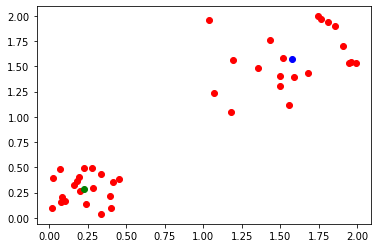

In [75]:
fig, ax = plt.subplots()

for i in range(num_rows):
  ax.plot(data1[i][0],data1[i][1],'ro')
ax.plot(centro[0][0], centro[0][1],'bo')
ax.plot(centro[1][0], centro[1][1],'go')

plt.show()

In [76]:
def findcent(pts,data1):
  num_rows, num_colum = data1.shape
  k=2
  # for i in range(k):
  #   centro_dist_each_point[i]=np.sum((pts[i]-data1)**2,axis=1)
  centro_dist_each_point[0]=np.sum((pts[0]-data1)**2 ,axis=1)
  centro_dist_each_point[1]=np.sum((pts[1]-data1)**2 ,axis=1)
  cl1x,cl2x,cl1y,cl2y=0,0,0,0
  e1,e2=0,0
  for i in range(num_rows):
    if(centro_dist_each_point[0][i]>centro_dist_each_point[1][i]):
      cl1x+=data1[i][0]
      cl1y+=data1[i][1]
      e1+=1
    else:
      cl2x+=data1[i][0]
      cl2y+=data1[i][1]
      e2+=1

  centro=np.array([[cl1x,cl1y],[cl2x,cl2y]])#this is our new centers from which we would be calculating distance
  centro[0]=np.divide(centro[0],e1)
  centro[1]=np.divide(centro[1],e2)
  return(centro)
  

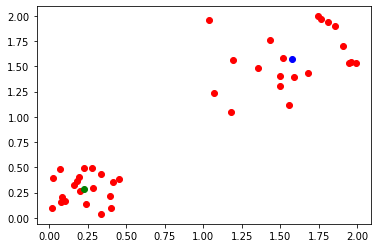

[[1.58058247 1.56897412]
 [0.22331067 0.28960446]]


In [77]:
# pt=[[1.30349477,1.28300202],[0.1562142 , 0.27239423]]
pt=[[1.58058247, 1.56897412],[0.22331067, 0.28960446]]
for i in range(30):
  pt=findcent(pt,data1)

fig, ax = plt.subplots()
for i in range(num_rows):
  ax.plot(data1[i][0],data1[i][1],'ro')
ax.plot(pt[0][0], pt[0][1],'bo')
ax.plot(pt[1][0], pt[1][1],'go')
plt.show()
# plt.plot(data1,'bo')
# plt.plot(pt[0],pt[1],'r+')
print(pt)

I found this really helpfull

[Link to github](https://github.com/llSourcell/k_means_clustering)

The next session is copied from here. Check if want to have more than two class or the value of k is more than 2.

In [78]:
def load_dataset(name):
    return np.loadtxt(name)


def euclidian(a, b):
    return np.linalg.norm(a-b)


def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']
    fig, ax = plt.subplots()
    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                plt.pause(0.8)


def kmeans(k, epsilon=0, distance='euclidian'):
    history_centroids = []
    if distance == 'euclidian':
        dist_method = euclidian
    dataset = load_dataset('durudataset.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,instance)
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
        tmp_prototypes = np.zeros((k, num_features))

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            tmp_prototypes[index, :] = prototype
        prototypes = tmp_prototypes
        history_centroids.append(tmp_prototypes)

    return prototypes, history_centroids, belongs_to


In [79]:
def execute():
    dataset = load_dataset('durudataset.txt')
    centroids, history_centroids, belongs_to = kmeans(2)
    plot(dataset, history_centroids, belongs_to)

centroids 1 [0.70347859 0.6713917 ]


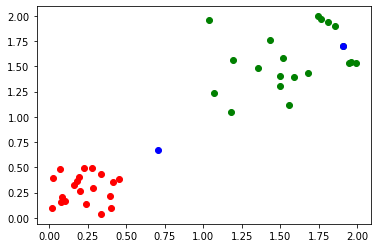

centroids 1 [1.58555852 1.8176032 ]
centroids 2 [0.30560454 0.36706042]
centroids 2 [1.63080905 1.61645791]
centroids 3 [0.22331067 0.28960446]
centroids 3 [1.58058247 1.56897412]
centroids 4 [0.22331067 0.28960446]
centroids 4 [1.58058247 1.56897412]
centroids 5 [0.22331067 0.28960446]
centroids 5 [1.58058247 1.56897412]


In [80]:
execute()